

# Project: Investigate a Dataset - [IMDb movie data]



<a id='intro'></a>
## Introduction

### Dataset Description 

 

    * id                  -->       Unique Id for the movie.
    * imdb_id             -->       IMDB Id for the movie.
    * popularity          -->       Indicates the popularity of the movie. Higher the number, higher the popularity.
    * budget              -->       Budget spent for the movie.
    * revenue             -->       Revenue generated by the movie.
    * original_title      -->       The title of the movie.
    * cast                -->       These are the cast for the movie separated by '|' symbol.
    * homepage            -->       Url for the movie web page.
    * director            -->       Director of the movie.
    * tagline             -->       Short tagline that comes with the title.
    * Keywords            -->       These are the keywords for the movie separated by '|' symbol  
    * overview            -->		A brief description of the movie plot.						
    * runtime             -->       Length of the movie in minutes.
    * genres              -->       Genre of the movie separated by '|' symbol.
    * production_companies-->       Production companies separated by '|' symbol.
    * release_date        -->       Date of release of the movie in mm/dd/yy format.
    * vote_count          -->       Number of votes for the movie.
    * vote_average        -->       Average votes for the movie.
    * release_year        -->       Year of release of the movie in yyyy format.
    * budget_adj          -->       Adjudsted budget for the movie.
    * revenue_adj         -->       Adjusted revenue generated by the movie.

### Question(s) for Analysis
> Research Question 1: Does the budget and revenue have any impact on ratings?

> Research Question 2 (Is there any relationship between revenue and the weekend of release? How will this change when we include the popularity?)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Load the data to dataframe

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


* Check for duplicate as imdb_id has frequency of 2 even though it is an id column and drop it

In [5]:
df[df.duplicated()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df[df['imdb_id'] == 'tt0411951']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
df = df.drop_duplicates()
df.shape

(10865, 21)

In [8]:
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10855,10865.000000,1.086500e+04,1.086500e+04,10865,10789,2936,10821,8041,...,10861,10865.000000,10842,9835,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt3277552,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66066.374413,NaN,0.646446,1.462429e+07,3.982690e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.071790,NaN,NaN,NaN,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,NaN,1.000231,3.091428e+07,1.170083e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.382701,NaN,NaN,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,NaN,0.207575,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,NaN,0.383831,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,NaN,0.713857,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07


* Let's consider vote_average as the dependent variable. We shall create another variable called Rating which is binned between 1 to 10 to make it a discrete variable

In [9]:
df.vote_average.nunique()

72

In [10]:
df.vote_average.unique()

array([ 6.5,  7.1,  6.3,  7.5,  7.3,  7.2,  5.8,  7.6,  8. ,  6.2,  5.2,
        7.4,  6.1,  7. ,  6.8,  5.3,  7.8,  6.4,  6.6,  7.7,  5.6,  6.9,
        5.9,  6.7,  5.5,  5. ,  4.4,  5.4,  5.1,  4.8,  5.7,  4.1,  3.9,
        4.5,  6. ,  4.2,  3.6,  4.3,  4.9,  4.7,  4. ,  3.5,  3.8,  3.3,
        3.7,  4.6,  7.9,  8.2,  2.6,  3.1,  8.9,  3.2,  2.4,  8.4,  3. ,
        2.8,  3.4,  8.8,  8.1,  8.3,  2.7,  2.5,  2.1,  8.6,  2.9,  8.5,
        9.2,  2.2,  2. ,  8.7,  2.3,  1.5])

* There are 72 values and between 1 and 2 we have only 1.5 and between 9 and 10 we have only 9.2. Rest from 2 to 9 has all values between x.1 to x.9. We will group these values by rounding to nearest rating and creating a new variable called "rating" which will be our dependent variable.

In [11]:
df['rating'] = df.vote_average.apply(lambda x: round(x))

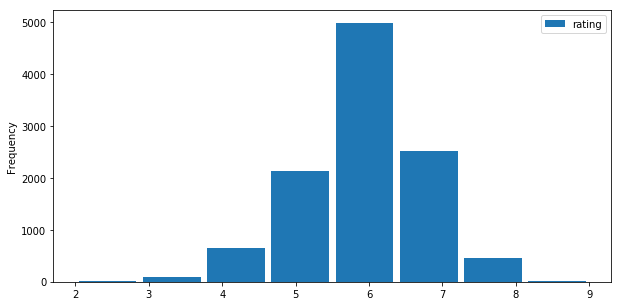

In [12]:
df.rating.plot(kind='hist',bins=8, legend='rating', rwidth=0.9, figsize=(10, 5))

* Based on the above histogram, there are more movies rated between 5 and 7.

In [13]:
#Dropping voting_average
df = df.drop('vote_average', axis=1)
df.shape

(10865, 21)

### Handle null values

In [14]:
df_null = pd.DataFrame(df.isna().sum())
df_null = df_null.reset_index()
df_null.columns = ['column_name', 'null_count']
df_null = df_null.sort_values(by='null_count', ascending=False)
df_null = df_null[df_null['null_count'] > 0]
df_null

,column_name,null_count
7,homepage,7929
9,tagline,2824
10,keywords,1493
14,production_companies,1030
6,cast,76
8,director,44
13,genres,23
1,imdb_id,10
11,overview,4


#### Deciding on Homepage's impact on rating

In [15]:
#Checking homepage data
df.homepage.nunique()

2896

* Out of 2969 homepage urls available,  2896 are unique. Let's check the significance of presence of homepage with the dependent variable rating. Does presence of homepage have any impact on rating? 

In [16]:
df_temp = df.copy()

In [17]:
df_temp['homepage_present'] = df_temp.homepage.isna()==False

In [18]:
homepage_present = df_temp['homepage_present']==True
homepage_not_present = df_temp['homepage_present']==False

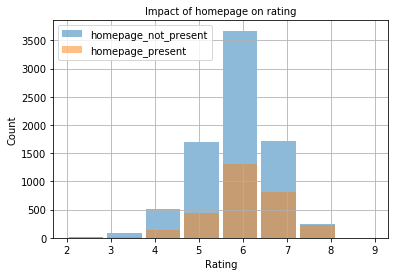

In [19]:
fig, ax = plt.subplots()
df_temp.rating[homepage_not_present].hist(alpha=0.5, bins=8, rwidth=0.9, label='homepage_not_present')
df_temp.rating[homepage_present].hist(alpha=0.5, bins=8,  rwidth=0.9, label='homepage_present')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Impact of homepage on rating', fontsize=10)
plt.legend();

* Since the homepage does not have any impact on the rating, we can drop homepage 

In [20]:
df = df.drop('homepage', axis=1)
df.shape

(10865, 20)

#### Deciding on tag line's impact on rating

In [21]:
df_temp.head().tagline

0                The park is open.
1               What a Lovely Day.
2       One Choice Can Destroy You
3    Every generation has a story.
4              Vengeance Hits Home
Name: tagline, dtype: object

In [22]:
df_temp['tagline_present'] = df_temp.tagline.isna()==False

In [23]:
tagline_present = df_temp['tagline_present']==True
tagline_not_present = df_temp['tagline_present']==False

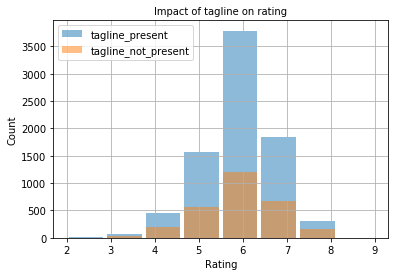

In [24]:
fig, ax = plt.subplots()
df_temp.rating[tagline_present].hist(alpha=0.5, bins=8,  rwidth=0.9, label='tagline_present')
df_temp.rating[tagline_not_present].hist(alpha=0.5, bins=8, rwidth=0.9, label='tagline_not_present')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Impact of tagline on rating', fontsize=10)
plt.legend();

* Since the tag line does not have any impact on the rating, we can drop tag line 

In [25]:
df = df.drop('tagline', axis=1)
df.shape

(10865, 19)

#### Deciding on keywords, production_companies, cast, director, genres, overview 

* All these variables are string based and imdb_id is an id column. Hence we can drop these columns

In [26]:
df = df.drop(['keywords', 'production_companies', 'cast', 'director', 'overview'], axis=1)
df.shape

(10865, 14)

In [27]:
df = df.drop('imdb_id', axis=1)
df.shape

(10865, 13)

In [28]:
df.describe(include='all')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year,budget_adj,revenue_adj,rating
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865,10865.000000,10842,10865,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000
unique,NaN,NaN,NaN,NaN,10571,NaN,2039,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Hamlet,NaN,Comedy,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4,NaN,712,28,NaN,NaN,NaN,NaN,NaN
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,NaN,102.071790,NaN,NaN,217.399632,2001.321859,1.754989e+07,5.136900e+07,5.971008
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,NaN,31.382701,NaN,NaN,575.644627,12.813260,3.430753e+07,1.446383e+08,0.973691
min,5.000000,0.000065,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,10.000000,1960.000000,0.000000e+00,0.000000e+00,2.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,NaN,90.000000,NaN,NaN,17.000000,1995.000000,0.000000e+00,0.000000e+00,5.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,NaN,99.000000,NaN,NaN,38.000000,2006.000000,0.000000e+00,0.000000e+00,6.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,NaN,111.000000,NaN,NaN,146.000000,2011.000000,2.085325e+07,3.370173e+07,7.000000


* Let's drop the other non-null string variables. Original Title is the other variable to be dropped

In [29]:
df = df.drop('original_title', axis=1)
df.shape

(10865, 12)

* Let's get the month data from release date 

In [30]:
df['release_date_formatted'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df['month'] = df['release_date_formatted'].dt.month

In [31]:
df = df.drop('release_date', axis=1)
#df = df.drop('release_date_formatted', axis=1)
df.shape

(10865, 13)

In [32]:
df.describe(include='all')

,id,popularity,budget,revenue,runtime,genres,vote_count,release_year,budget_adj,revenue_adj,rating,release_date_formatted,month
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10842,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865,10865.000000
unique,NaN,NaN,NaN,NaN,NaN,2039,NaN,NaN,NaN,NaN,NaN,5909,NaN
top,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,2009-01-01 00:00:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,712,NaN,NaN,NaN,NaN,NaN,28,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2068-12-22 00:00:00,NaN
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,NaN,217.399632,2001.321859,1.754989e+07,5.136900e+07,5.971008,NaN,6.827612
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,NaN,575.644627,12.813260,3.430753e+07,1.446383e+08,0.973691,NaN,3.441764
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,NaN,10.000000,1960.000000,0.000000e+00,0.000000e+00,2.000000,NaN,1.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,NaN,17.000000,1995.000000,0.000000e+00,0.000000e+00,5.000000,NaN,4.000000



### Research Question 1: Does the budget and revenue have any impact on ratings? 

* As we have seen before in the analysis, the ratings are between 2 and 9. The maximum number of movies reveived a 5.5-6.5 rating. And as we moved up or down, the frequency reduced. Let's now check the properties of budget.

* Since budget is is in the order of millions, let's divide the budget variable by one million to standardise the values

In [36]:
df['budget_adj'] = df['budget_adj']/1000000

Let's identify whether all the movies have budget information. We will check the count of movies where the budget is zero and greater than zero.

In [37]:
df[df['budget_adj'] == 0]['budget_adj'].count()

5696

Out of 10865 movies, 5696 do not have the budget details. We will check the range of budget of movies

In [38]:
movies_with_budget = df['budget_adj']>0
df[movies_with_budget]['budget_adj'].describe()

count    5.169000e+03
mean     3.688907e+01
std      4.196096e+01
min      9.210911e-07
25%      8.102293e+00
50%      2.271505e+01
75%      5.008384e+01
max      4.250000e+02
Name: budget_adj, dtype: float64

Majority of movies have budget between 6 million to 40 million dollars.

In [40]:
df['budget_group'] = pd.qcut(df[movies_with_budget]['budget_adj'], 8)
df[movies_with_budget].groupby(by='budget_group')['budget_group'].count()

budget_group
(-0.000999079, 3.038]    648
(3.038, 8.102]           647
(8.102, 14.4]            644
(14.4, 22.715]           646
(22.715, 33.421]         646
(33.421, 50.084]         648
(50.084, 81.023]         647
(81.023, 425.0]          643
Name: budget_group, dtype: int64

There are: 
* 648 movies made with budget between 0 and 3 million 
* 647 movies between 3 and 8.1 million 
* 644 movies between 8.1 and 14.4 million
* 646 movies between 14.4 and 22.7 million 
* 646 movies between 22.7 and 33.4 million
* 648 movies between 33.4 and 50 million
* 647 movies between 50 and 81 million
* 643 movies between 81 and 425 million

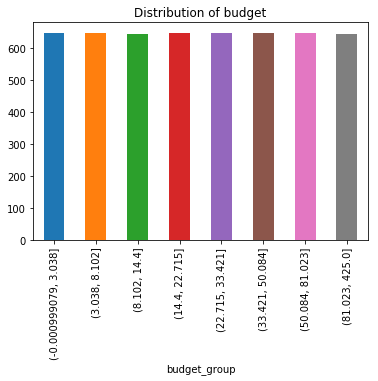

In [41]:
df[movies_with_budget].groupby(by='budget_group')['budget_group'].count().plot(kind='bar', title='Distribution of budget', label='budget');

In [42]:
mean_rating_by_budget_group = df[movies_with_budget].groupby(by='budget_group')['rating'].mean()
mean_rating_by_budget_group

budget_group
(-0.000999079, 3.038]    5.802469
(3.038, 8.102]           5.914992
(8.102, 14.4]            6.004658
(14.4, 22.715]           6.035604
(22.715, 33.421]         6.126935
(33.421, 50.084]         6.083333
(50.084, 81.023]         6.054096
(81.023, 425.0]          6.185070
Name: rating, dtype: float64

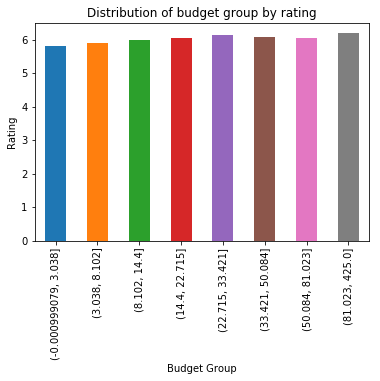

In [43]:
fig, ax = plt.subplots()
mean_rating_by_budget_group.plot(kind='bar', title='Distribution of budget group by rating')
plt.ylabel('Rating')
plt.xlabel('Budget Group');

Based on the data selected above, the budget doesn't seem to have any impact on rating. Now let's check the impact of revenue on rating.

* Since revenue is is in the order of millions, let's divide the revenue variable by one million to standardise the values

In [44]:
df['revenue_adj'] = df['revenue_adj']/1000000

In [46]:
movies_with_revenue = df['revenue_adj']>0 
mean_rating_by_revenue = df[movies_with_revenue].groupby(by='rating')['revenue_adj'].mean()
mean_rating_by_revenue

rating
2      5.293108
3     18.633458
4     32.976966
5     54.299225
6    105.210240
7    151.586754
8    273.738958
Name: revenue_adj, dtype: float64

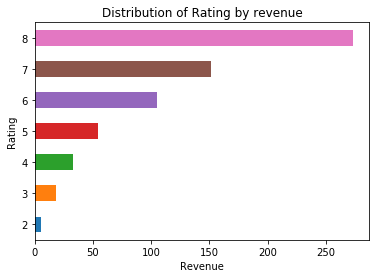

In [48]:
mean_rating_by_revenue.plot(kind='barh', title='Distribution of Rating by revenue')
plt.xlabel('Revenue')
plt.ylabel('Rating');

Based on the data selected above, we shall infer that more the rating, more the revenue.

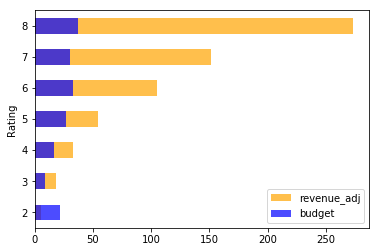

In [49]:
mean_rating_by_budget = df[movies_with_budget].groupby(by='rating')['budget'].mean()
mean_rating_by_revenue.plot(kind='barh', legend='Revenue', alpha=0.7, color='orange')
mean_rating_by_budget.plot(kind='barh', legend='Budget', alpha=0.7, color='blue')
plt.ylabel('Rating');

When we compare the budget and revenue against rating, even though the budget for all movies remained almost the same, the revenue increased to a greater extent.

### Research Question 2  (Is there any relationship between revenue and the weekend of release? How will this change when we include the popularity?)

Let's get the movies which were released on a Friday which is considered as a weekend release

In [50]:
df['is_weekend_release'] = df['release_date_formatted'].dt.weekday == 4

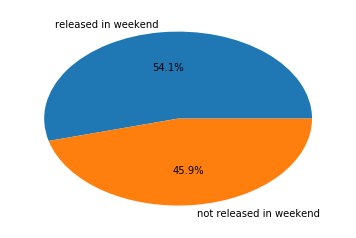

In [51]:
fig, ax = plt.subplots()
ax.pie(df[movies_with_revenue]['is_weekend_release'].value_counts(), labels = ['released in weekend', 'not released in weekend'], autopct = '%.1f%%')
plt.show();

As we can observe 54.1% movies have released on Fridays(weekend release) and 45.9% movies have released on other days.

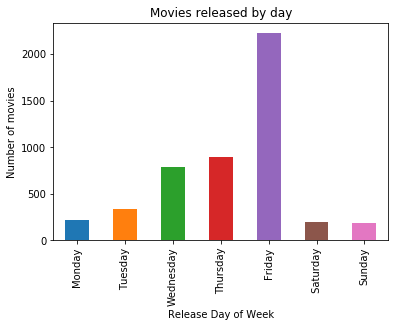

In [52]:
weekday = df[movies_with_revenue]['release_date_formatted'].dt.weekday
fig, ax = plt.subplots()
df[movies_with_revenue].groupby(weekday)['release_date_formatted'].count().plot('bar')
ax.set_xlabel('Release Day of Week')
ax.set_ylabel('Number of movies')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday'])
plt.title('Movies released by day');

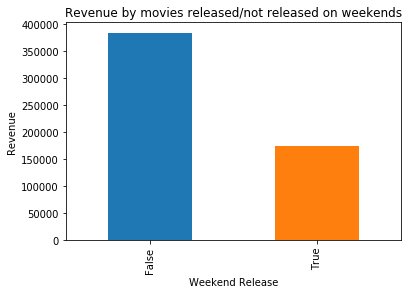

In [53]:
df[movies_with_revenue].groupby(by='is_weekend_release')['revenue_adj'].sum().plot(kind='bar')
plt.title('Revenue by movies released/not released on weekends')
plt.xlabel('Weekend Release')
plt.ylabel('Revenue');

Even though more movies released in weekends, the revenue is more for movies released on weekdays.

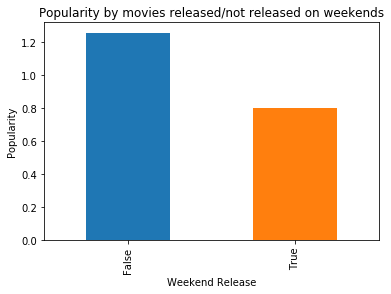

In [54]:
df[movies_with_revenue].groupby(by='is_weekend_release')['popularity'].mean().plot(kind='bar')
plt.title('Popularity by movies released/not released on weekends')
plt.xlabel('Weekend Release')
plt.ylabel('Popularity');

Even though more movies released in weekends, the popularity is more for movies released on weekdays.

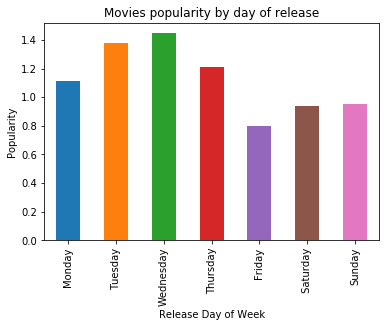

In [55]:
weekday = df[movies_with_revenue]['release_date_formatted'].dt.weekday
fig, ax = plt.subplots()
df[movies_with_revenue].groupby(weekday)['popularity'].mean().plot('bar')
ax.set_xlabel('Release Day of Week')
ax.set_ylabel('Popularity')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday'])
plt.title('Movies popularity by day of release');


## Conclusions

* The ratings of the movies in the dataset are between 2 and 9. The maximum number of movies received a 5.5-6.5 rating. And as   we moved up or down, the frequency reduced.
* Homepage and tag line do not have any impact on the rating of these movies.
* Majority of the movies in the dataset have budget between 6 million to 40 million dollars.
* Based on the data, the budget doesn't seem to have any impact on the rating, but more the rating more the revenue.
* When we compare the budget and revenue data against rating, even though the budget for all movies remained almost the same,     the revenue increased to a greater extent.
* 54.1% movies in this dataset were released on Fridays(weekend release) and 45.9% on other days.
* Even though more movies were released on weekends, the revenue and popularity were more for those released on weekdays.

### Limitations
* Around 50% of the movies did not have budget and revenue data and this might have impacted our analysis.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0